In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from math import sqrt

In [2]:
train_df = pd.read_csv('bigmart_train.csv')
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train_df.shape

(8523, 12)

In [4]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# Randomly found 2 interesting fields
# Fat content type is Regular and Low Fat but used diferent abbrivations.
print("Item_Fat_Content: ", train_df["Item_Fat_Content"].unique())

# We can use this field to get age of outlet
print("Outlet_Establishment_Year: ", train_df["Outlet_Establishment_Year"].unique())

Item_Fat_Content:  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Outlet_Establishment_Year:  [1999 2009 1998 1987 1985 2002 2007 1997 2004]


In [6]:
Outlet_Age = 2022 - train_df["Outlet_Establishment_Year"]
Outlet_Age
train_df.insert(8, "Outlet_Age", Outlet_Age)

In [7]:
train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,23,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,13,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,23,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,24,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,35,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,13,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,35,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,37,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,20,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,15,NaN,Tier 2,Supermarket Type1,4710.5350


In [8]:
# Getting insights of the data
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,24.168133,2181.288914
std,4.643456,0.051598,62.275067,8.371760,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,13.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,18.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,23.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,35.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,37.000000,13086.964800


Found that few items have zero visibility in the stores.

In [9]:
#Lets take care of the missing values in Item_Weight and Outlet_Size feild.
# For Strings we use Mode and for Numeric we either use Mean or median depending on the need.

train_df["Item_Weight"].fillna(train_df["Item_Weight"].mean(), inplace=True)
train_df["Outlet_Size"].fillna(train_df["Outlet_Size"].mode()[0], inplace=True)
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Age                   0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

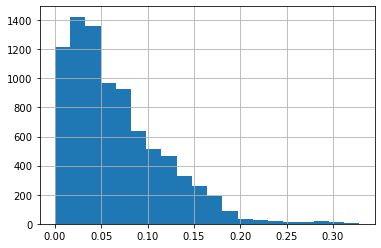

In [10]:
# Detecting the outliers
train_df["Item_Visibility"].hist(bins=20)

### Oultier is data point that lies outside the overall pattern in the distribution. Common rule of outlier is if it is more then 1.5 IQR above the 3rd quartile or 1.5 IQR below the first quartile.

In [11]:
Q1 = train_df["Item_Visibility"].quantile(0.25)
Q3 = train_df["Item_Visibility"].quantile(0.75)

IQR = Q3 - Q1

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

Q1:  0.0269894775
Q3:  0.0945852925
IQR:  0.067595815


In [12]:
#So we are removing outliers using query if Item_visibility is in range.

clean_train_df = train_df.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')
clean_train_df.shape

(8379, 13)

In [13]:
#Now that we have removed outliers, Lets make Visibility Categorical in nature.
Item_Visibility_Cat = pd.cut(clean_train_df['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=["Low", "Ok", "High"])

clean_train_df.insert(4, 'Item_Visibility_Cat', Item_Visibility_Cat)
print(clean_train_df.isnull().sum())

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Visibility_Cat          526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Age                     0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64


In [16]:
# Taking car eof the Null Values in the Visibility categories with Low
clean_train_df["Item_Visibility_Cat"].fillna("Low", inplace=True)
print(clean_train_df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Visibility_Cat          0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Age                   0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [17]:
# Fat content type is Regular and Low Fat but used diferent abbrivations: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

clean_train_df["Item_Fat_Content"].replace(['low fat', 'LF'], 'Low Fat', inplace=True)
clean_train_df["Item_Fat_Content"].replace(['reg'], 'Regular', inplace=True)

print("Item_Fat_Content: ", clean_train_df["Item_Fat_Content"].unique())

Item_Fat_Content:  ['Low Fat' 'Regular']


In [18]:
# Displaying random sample data
clean_train_df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Visibility_Cat,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4232,FDS03,7.825000,Low Fat,0.079629,Ok,Meat,63.4826,OUT046,1997,25,Small,Tier 1,Supermarket Type1,2002.0606
791,FDW49,19.500000,Low Fat,0.000000,Low,Canned,179.3002,OUT049,1999,23,Medium,Tier 1,Supermarket Type1,2328.3026
3958,FDB08,6.055000,Low Fat,0.031152,Low,Fruits and Vegetables,158.7578,OUT049,1999,23,Medium,Tier 1,Supermarket Type1,2085.9514
5416,FDN03,12.857645,Regular,0.015017,Low,Meat,248.6408,OUT027,1985,37,Medium,Tier 3,Supermarket Type3,6759.2016
3903,FDZ26,12.857645,Regular,0.143320,High,Dairy,237.5222,OUT027,1985,37,Medium,Tier 3,Supermarket Type3,7170.6660
6529,DRK39,7.020000,Low Fat,0.049865,Low,Dairy,82.9250,OUT046,1997,25,Small,Tier 1,Supermarket Type1,1165.1500
6973,NCL18,18.850000,Low Fat,0.167552,High,Household,193.1136,OUT035,2004,18,Small,Tier 2,Supermarket Type1,2332.9632
1609,FDU59,5.780000,Low Fat,0.096386,Ok,Breads,163.5552,OUT046,1997,25,Small,Tier 1,Supermarket Type1,1787.0072
3311,NCI18,18.350000,Low Fat,0.014052,Low,Household,224.0746,OUT045,2002,20,Medium,Tier 2,Supermarket Type1,1346.2476
2140,DRE03,19.600000,Low Fat,0.024364,Low,Dairy,46.3718,OUT017,2007,15,Medium,Tier 2,Supermarket Type1,661.8052


In [19]:
# LabelEncoder: Converting categorical values to Numric

le = LabelEncoder()

In [20]:
clean_train_df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [24]:
#transforming all the categorical data
clean_train_df['Item_Fat_Content'] = le.fit_transform(clean_train_df['Item_Fat_Content'])
clean_train_df['Item_Visibility_Cat'] = le.fit_transform(clean_train_df['Item_Visibility_Cat'])
clean_train_df['Outlet_Size'] = le.fit_transform(clean_train_df['Outlet_Size'])
clean_train_df['Outlet_Location_Type'] = le.fit_transform(clean_train_df['Outlet_Location_Type'])

clean_train_df.sample(n=10)


C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_6412/1821819855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_train_df['Item_Fat_Content'] = le.fit_transform(clean_train_df['Item_Fat_Content'])
C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_6412/1821819855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_train_df['Item_Visibility_Cat'] = le.fit_transform(clean_train_df['Item_Visibility_Cat'])
C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_6412/1821819855.py:4: SettingWithCopyWarning: 
A value 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Visibility_Cat,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
128,DRG23,8.880000,0,0.086709,2,Hard Drinks,151.7682,OUT013,1987,35,0,2,Supermarket Type1,762.3410
5984,NCI43,19.850000,0,0.026116,1,Household,49.0376,OUT017,2007,15,1,1,Supermarket Type1,143.8128
6062,FDX39,14.300000,1,0.083148,2,Meat,210.1586,OUT010,1998,24,1,2,Grocery Store,422.1172
3496,FDF39,14.850000,1,0.019591,1,Dairy,261.5910,OUT018,2009,13,1,2,Supermarket Type2,2366.9190
6871,FDV10,12.857645,1,0.116794,2,Snack Foods,41.0112,OUT019,1985,37,2,0,Grocery Store,42.6112
4942,FDE11,17.700000,1,0.135306,0,Starchy Foods,183.7924,OUT049,1999,23,1,0,Supermarket Type1,2221.1088
7534,FDO60,12.857645,0,0.034203,1,Baking Goods,43.3086,OUT027,1985,37,1,2,Supermarket Type3,624.5204
6339,FDC28,7.905000,0,0.055098,1,Frozen Foods,109.2254,OUT045,2002,20,1,1,Supermarket Type1,976.7286
8465,FDX11,16.000000,1,0.106969,2,Baking Goods,180.5634,OUT045,2002,20,1,1,Supermarket Type1,2726.4510
1959,FDI16,14.000000,1,0.135663,0,Frozen Foods,52.0640,OUT013,1987,35,0,2,Supermarket Type1,852.2240


In [25]:
# get_dummies: Convert categorical variable into dummy/indicator variables.
outlet_type_dummy = pd.get_dummies(clean_train_df["Outlet_Type"])
outlet_type_dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [26]:
# Merging both dataframes
clean_train_df = pd.concat([clean_train_df, outlet_type_dummy], axis=1)
clean_train_df.sample(n=10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Visibility_Cat,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
5488,FDX11,16.000000,1,0.106752,2,Baking Goods,181.4634,OUT046,1997,25,2,0,Supermarket Type1,1090.5804,0,1,0,0
5600,FDR22,19.350000,1,0.018563,1,Snack Foods,110.5544,OUT046,1997,25,2,0,Supermarket Type1,1565.9616,0,1,0,0
4362,FDZ04,9.310000,0,0.037955,1,Frozen Foods,62.1510,OUT046,1997,25,2,0,Supermarket Type1,1201.7690,0,1,0,0
1231,FDN23,6.575000,1,0.075661,2,Breads,145.4444,OUT045,2002,20,1,1,Supermarket Type1,2612.5992,0,1,0,0
6079,FDH28,15.850000,1,0.110010,2,Frozen Foods,38.8506,OUT035,2004,18,2,1,Supermarket Type1,341.5554,0,1,0,0
4060,NCI18,12.857645,0,0.013956,1,Household,222.3746,OUT027,1985,37,1,2,Supermarket Type3,5609.3650,0,0,0,1
5215,FDY52,6.365000,0,0.000000,1,Frozen Foods,59.7536,OUT017,2007,15,1,1,Supermarket Type1,980.0576,0,1,0,0
697,NCU17,5.320000,0,0.093028,2,Health and Hygiene,101.4674,OUT049,1999,23,1,0,Supermarket Type1,2954.1546,0,1,0,0
3475,FDN58,13.800000,1,0.056825,1,Snack Foods,230.9984,OUT013,1987,35,0,2,Supermarket Type1,4633.9680,0,1,0,0
5220,DRG39,14.150000,0,0.042181,1,Dairy,52.0982,OUT046,1997,25,2,0,Supermarket Type1,578.5802,0,1,0,0


In [27]:
clean_train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Visibility_Cat            int32
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Age                     int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [28]:
# For model building we need to use relavant features only and we drop rest of the features.
clean_train_df.drop(columns=["Item_Identifier", "Item_Type", "Outlet_Identifier", "Outlet_Type", "Outlet_Establishment_Year"], inplace=True)

In [29]:
clean_train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Visibility_Cat,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,1,249.8092,23,1,0,3735.1380,0,1,0,0
1,5.92,1,0.019278,1,48.2692,13,1,2,443.4228,0,0,1,0
2,17.50,0,0.016760,1,141.6180,23,1,0,2097.2700,0,1,0,0
3,19.20,1,0.000000,1,182.0950,24,1,2,732.3800,1,0,0,0
4,8.93,0,0.000000,1,53.8614,35,0,2,994.7052,0,1,0,0


In [30]:
x_features = clean_train_df.drop('Item_Outlet_Sales', axis=1)
y_target = clean_train_df.Item_Outlet_Sales

x_features.shape, y_target.shape

((8379, 12), (8379,))

# Reading and applying data wrangling on test data.

## Here we are applying mostly all the techniques we lerned in previous section about the data

In [31]:
# Reading the Test Data
test_df = pd.read_csv('bigmart_test.csv')
test_df.sample(n=10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3817,NCH06,12.300,Low Fat,0.076540,Household,245.2460,OUT035,2004,Small,Tier 2,Supermarket Type1
4431,NCY53,NaN,Low Fat,0.102393,Health and Hygiene,113.1544,OUT019,1985,Small,Tier 1,Grocery Store
1694,FDV50,14.300,Low Fat,0.122548,Dairy,122.1730,OUT035,2004,Small,Tier 2,Supermarket Type1
4127,FDN50,16.850,Regular,0.000000,Canned,93.7120,OUT010,1998,NaN,Tier 3,Grocery Store
3297,FDS60,20.850,Low Fat,0.032499,Baking Goods,181.2660,OUT049,1999,Medium,Tier 1,Supermarket Type1
952,FDT38,18.700,Low Fat,0.057863,Dairy,86.2566,OUT017,2007,NaN,Tier 2,Supermarket Type1
3921,FDT08,13.650,Low Fat,0.049218,Fruits and Vegetables,148.9050,OUT046,1997,Small,Tier 1,Supermarket Type1
1690,FDI40,11.500,Regular,0.125498,Frozen Foods,99.7358,OUT013,1987,High,Tier 3,Supermarket Type1
2522,FDX59,10.195,Low Fat,0.086470,Breads,33.6558,OUT010,1998,NaN,Tier 3,Grocery Store
3836,FDX21,7.050,Low Fat,0.084895,Snack Foods,110.5912,OUT013,1987,High,Tier 3,Supermarket Type1


In [32]:
Outlet_Age = 2022 - test_df["Outlet_Establishment_Year"]
Outlet_Age
test_df.insert(8, "Outlet_Age", Outlet_Age)

In [33]:
#Lets take care of the missing values in Item_Weight and Outlet_Size feild.
# For Strings we use Mode and for Numeric we either use Mean or median depending on the need.

test_df["Item_Weight"].fillna(test_df["Item_Weight"].mean(), inplace=True)
test_df["Outlet_Size"].fillna(test_df["Outlet_Size"].mode()[0], inplace=True)
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Age                   0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [34]:
Item_Visibility_Cat = pd.cut(test_df['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=["Low", "Ok", "High"])

test_df.insert(4, 'Item_Visibility_Cat', Item_Visibility_Cat)
print(test_df.isnull().sum())

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Visibility_Cat          459
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Age                     0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64


In [35]:
test_df['Item_Visibility_Cat'].fillna("Low", inplace=True)
test_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Visibility_Cat          0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Age                   0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [36]:
test_df["Item_Fat_Content"].replace(['LF', 'low fat'], 'Low Fat', inplace=True)
test_df["Item_Fat_Content"].replace('reg', 'Regular', inplace=True)
test_df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [37]:
#transforming all the categorical data
test_df.columns
test_df['Item_Fat_Content'] = le.fit_transform(test_df['Item_Fat_Content'])
test_df['Item_Visibility_Cat'] = le.fit_transform(test_df['Item_Visibility_Cat'])
test_df['Outlet_Size'] = le.fit_transform(test_df['Outlet_Size'])
test_df['Outlet_Location_Type'] = le.fit_transform(test_df['Outlet_Location_Type'])

test_df.sample(n=10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Visibility_Cat,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type
2848,FDA02,14.000000,1,0.049750,1,Dairy,144.8786,OUT010,1998,24,1,2,Grocery Store
1863,FDL02,20.000000,1,0.104294,2,Canned,105.5622,OUT045,2002,20,1,1,Supermarket Type1
877,FDW59,13.150000,0,0.020748,1,Breads,82.7566,OUT049,1999,23,1,0,Supermarket Type1
3636,FDA16,6.695000,0,0.034011,1,Frozen Foods,221.8456,OUT045,2002,20,1,1,Supermarket Type1
3705,FDZ40,8.935000,0,0.040183,1,Frozen Foods,52.9298,OUT046,1997,25,2,0,Supermarket Type1
3764,FDX48,17.750000,1,0.037965,1,Baking Goods,153.0656,OUT045,2002,20,1,1,Supermarket Type1
4791,FDU10,10.100000,1,0.045683,1,Snack Foods,38.2848,OUT035,2004,18,2,1,Supermarket Type1
3458,DRD01,12.695633,1,0.060879,1,Soft Drinks,53.3614,OUT027,1985,37,1,2,Supermarket Type3
1578,FDV21,11.500000,0,0.000000,1,Snack Foods,125.6704,OUT046,1997,25,2,0,Supermarket Type1
5541,FDF39,14.850000,1,0.019622,1,Dairy,261.4910,OUT017,2007,15,1,1,Supermarket Type1


In [38]:
outlet_type_dummy = pd.get_dummies(test_df["Outlet_Type"])
test_df = pd.concat([test_df, outlet_type_dummy], axis=1)
test_df.sample(n=10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Visibility_Cat,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
1623,NCI55,18.600000,0,0.012705,1,Household,122.8414,OUT018,2009,13,1,2,Supermarket Type2,0,0,1,0
4357,FDE10,6.670000,1,0.089873,2,Snack Foods,130.4626,OUT013,1987,35,0,2,Supermarket Type1,0,1,0,0
274,DRN59,15.000000,0,0.064129,1,Hard Drinks,45.9060,OUT035,2004,18,2,1,Supermarket Type1,0,1,0,0
7,FDC48,12.695633,0,0.015782,1,Baking Goods,81.0592,OUT027,1985,37,1,2,Supermarket Type3,0,0,0,1
4846,FDY08,12.695633,1,0.299531,1,Fruits and Vegetables,139.9838,OUT019,1985,37,2,0,Grocery Store,1,0,0,0
2765,FDH52,9.420000,1,0.043895,1,Frozen Foods,62.2194,OUT035,2004,18,2,1,Supermarket Type1,0,1,0,0
4426,FDV31,9.800000,0,0.106629,2,Fruits and Vegetables,177.7370,OUT013,1987,35,0,2,Supermarket Type1,0,1,0,0
1718,FDA31,7.100000,0,0.184137,0,Fruits and Vegetables,172.8080,OUT010,1998,24,1,2,Grocery Store,1,0,0,0
1906,NCN55,12.695633,0,0.059202,1,Others,239.3538,OUT027,1985,37,1,2,Supermarket Type3,0,0,0,1
4892,FDS50,17.000000,0,0.055659,1,Dairy,223.7114,OUT018,2009,13,1,2,Supermarket Type2,0,0,1,0


In [39]:
# For model building we need to use relavant features only and we drop rest of the features.
test_df.drop(columns=["Item_Identifier", "Item_Type", "Outlet_Identifier", "Outlet_Type", "Outlet_Establishment_Year"], inplace=True)
test_df.sample(n=10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Visibility_Cat,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
3250,6.425,0,0.093836,2,174.2712,13,1,2,0,0,1,0
933,15.500,1,0.156928,0,148.2418,25,2,0,0,1,0,0
3027,15.850,1,0.203588,1,61.6220,24,1,2,1,0,0,0
449,6.575,1,0.075815,2,144.6444,13,1,2,0,0,1,0
4977,15.850,1,0.121822,2,60.7220,23,1,0,0,1,0,0
2660,7.825,0,0.080079,2,65.1826,15,1,1,0,1,0,0
864,9.600,0,0.084883,2,106.5280,35,0,2,0,1,0,0
1062,18.250,0,0.076281,2,213.0218,13,1,2,0,0,1,0
1227,20.350,1,0.151380,0,80.1276,20,1,1,0,1,0,0
90,19.350,1,0.000000,1,165.7816,20,1,1,0,1,0,0


In [40]:
x_features.columns, test_df.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Visibility_Cat', 'Item_MRP', 'Outlet_Age', 'Outlet_Size',
        'Outlet_Location_Type', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Visibility_Cat', 'Item_MRP', 'Outlet_Age', 'Outlet_Size',
        'Outlet_Location_Type', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [41]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_features, y_target, test_size=0.3, random_state=42)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5865, 12), (2514, 12), (5865,), (2514,))

In [43]:
lin = LinearRegression()

In [44]:
lin.fit(x_train, y_train)

print(lin.coef_)
print(lin.intercept_)

[    3.32565903    27.49948402  -196.15278716    17.62300318
    15.96531149    -2.28120926    16.76148752     8.04121542
 -1753.70556394   219.18652367  -122.33893469  1656.85797495]
-184.4120528862759


In [45]:
predictions = lin.predict(x_test)

In [46]:
print(sqrt(mean_squared_error(y_test, predictions)))

1118.41605258575


In [47]:
# Calculating R^2 (R-Squared): https://www.youtube.com/watch?v=2AQKmw14mHM
print("R-Squared value: ", lin.score(x_test,y_test))

R-Squared value:  0.5486140031569204


# Ridge Model

In [48]:
from sklearn.linear_model import Ridge

In [49]:
rid = Ridge(alpha=0.001, normalize=True)
rid.fit(x_train, y_train)
rid_predictions = rid.predict(x_test)

In [50]:
print(sqrt(mean_squared_error(y_test,rid_predictions)))

1118.3593685856831


In [51]:
# Calculating R^2 (R-Squared): https://www.youtube.com/watch?v=2AQKmw14mHM
print("R-Squared value: ", rid.score(x_test, y_test))

R-Squared value:  0.548659756640925


# Lasso Model

In [52]:
from sklearn.linear_model import Lasso
lso = Lasso(alpha=0.001, normalize=True)

In [53]:
lso.fit(x_train, y_train)
lso_predictions = lso.predict(x_test)
print(sqrt(mean_squared_error(y_test, lso_predictions)))

1118.409534783899


In [54]:
# Calculating R^2 (R-Squared): https://www.youtube.com/watch?v=2AQKmw14mHM
print("R-Squared value: ", lso.score(x_test, y_test))

R-Squared value:  0.548619264232897


#  ElasticNet Model

In [55]:
from sklearn.linear_model import ElasticNet

el = ElasticNet(alpha=0.001, normalize=True)
el.fit(x_train, y_train)

el_predictions = el.predict(x_test)

In [56]:
print(sqrt(mean_squared_error(y_test, el_predictions)))

# Calculating R^2 (R-Squared): https://www.youtube.com/watch?v=2AQKmw14mHM
print("R-Squared value: ", el.score(x_test, y_test))

1429.14763111618
R-Squared value:  0.2629524857235679
